In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)

In [23]:

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'c801384f-2a2e-4703-a4ac-3581a9e9831d'
resource_group = 'nikhil66589openai'
workspace_name = 'nikhil66589AML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

= = Dataset.get_by_name(workspace, name='BangaloreHousePrice')
bangalorepricedf = dataset.to_pandas_dataframe()

In [25]:
bangalorepricedf.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200,2.0,1.0,51.00


In [26]:
bangalorepricedf.shape

(13320, 9)

In [28]:
##Data Clean Up, Identify the blanks

bangalorepricedf.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [32]:
## Dropping the Column Society as it doesnt add much to the dataset, also removing area_type(as we have total SQFT) and availability)
bangalorepricedf2 = bangalorepricedf.drop (['society','availability','area_type'], axis = 'columns')

In [33]:
bangalorepricedf2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [35]:
## Balcony - all the empty values are replaced with 0
bangalorepricedf2["balcony"] = bangalorepricedf2["balcony"].fillna(0)
bangalorepricedf2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [36]:
#Drop all the rows where there is still null values
bangalorepricedf3 = bangalorepricedf2.dropna()
bangalorepricedf3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [37]:
bangalorepricedf3.shape

(13246, 6)

In [38]:
bangalorepricedf3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [39]:
bangalorepricedf3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [41]:
##Create a new column called as BHK with value derived out of size column, drop the size column post creation of new attribute
bangalorepricedf3['bhk'] = bangalorepricedf3['size'].apply(lambda x: int(x.split(' ')[0]))
bangalorepricedf3 = bangalorepricedf3.drop (['size'], axis = 'columns')
bangalorepricedf3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [43]:
##Convert all the anomalies in the total SQFT to float values
bangalorepricedf3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [45]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


bangalorepricedf3[~bangalorepricedf3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [46]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

bangalorepricedf4  = bangalorepricedf3.copy()
bangalorepricedf4['total_sqft'] = bangalorepricedf4['total_sqft'].apply(convert_sqft_to_num)
bangalorepricedf4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [55]:
bangalorepricedf4[~bangalorepricedf4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk


In [68]:
#Assuming price is in Lakhs, create additional column price per sq ft 

bangalorepricedf4['price_per_sqft']  = bangalorepricedf4['price']*100000/bangalorepricedf4['total_sqft']
bangalorepricedf4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [69]:
len(bangalorepricedf4['location'].unique())

1304

In [70]:
#Identify the spread of data across multiple locations
bangalorepricedf5 = bangalorepricedf4.copy()

bangalorepricedf5.location = bangalorepricedf5.location.apply(lambda x: x.strip())
location_stats = bangalorepricedf5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [71]:
##Identify all the locations which has less than 10 entries in the list and classify it as others

location_stats_less_than_25 = location_stats[location_stats<=25]
location_stats_less_than_25


location
Magadi Road          25
Kogilu               25
Babusapalaya         25
Iblur Village        25
Seegehalli           25
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1176, dtype: int64

In [76]:
bangalorepricedf5.location = bangalorepricedf5.location.apply(lambda x: 'Other' if x in location_stats_less_than_25 else x)
print(len(bangalorepricedf5.location.unique()))
bangalorepricedf5.head()

118


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,other,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,other,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [131]:
bangalorepricedf6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

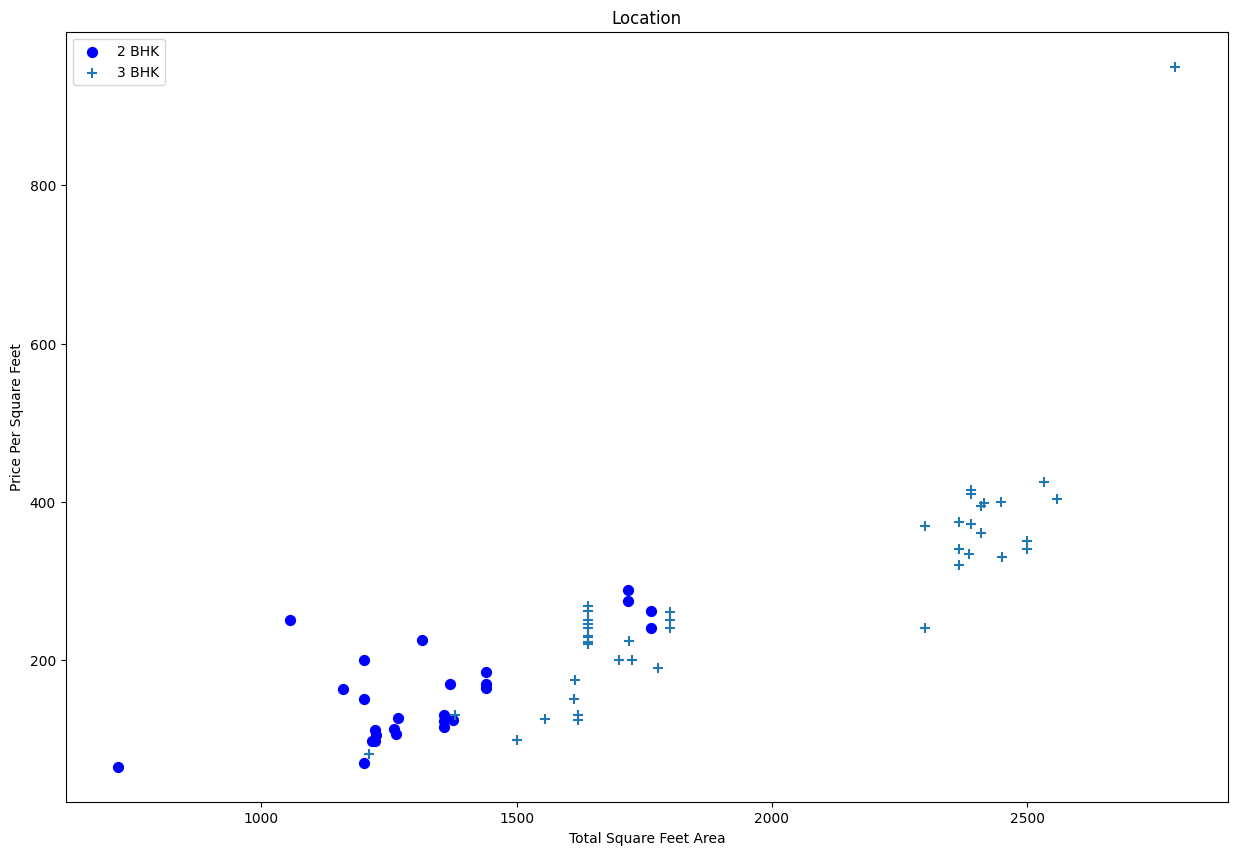

In [134]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(bangalorepricedf6.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue', label ='2 BHK', s = 50)
    plt.scatter (bhk3.total_sqft,bhk3.price, marker= '+', label = '3 BHK' , s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Location')
    plt.legend()

    
plot_scatter_chart(bangalorepricedf6, 'Rajaji Nagar')

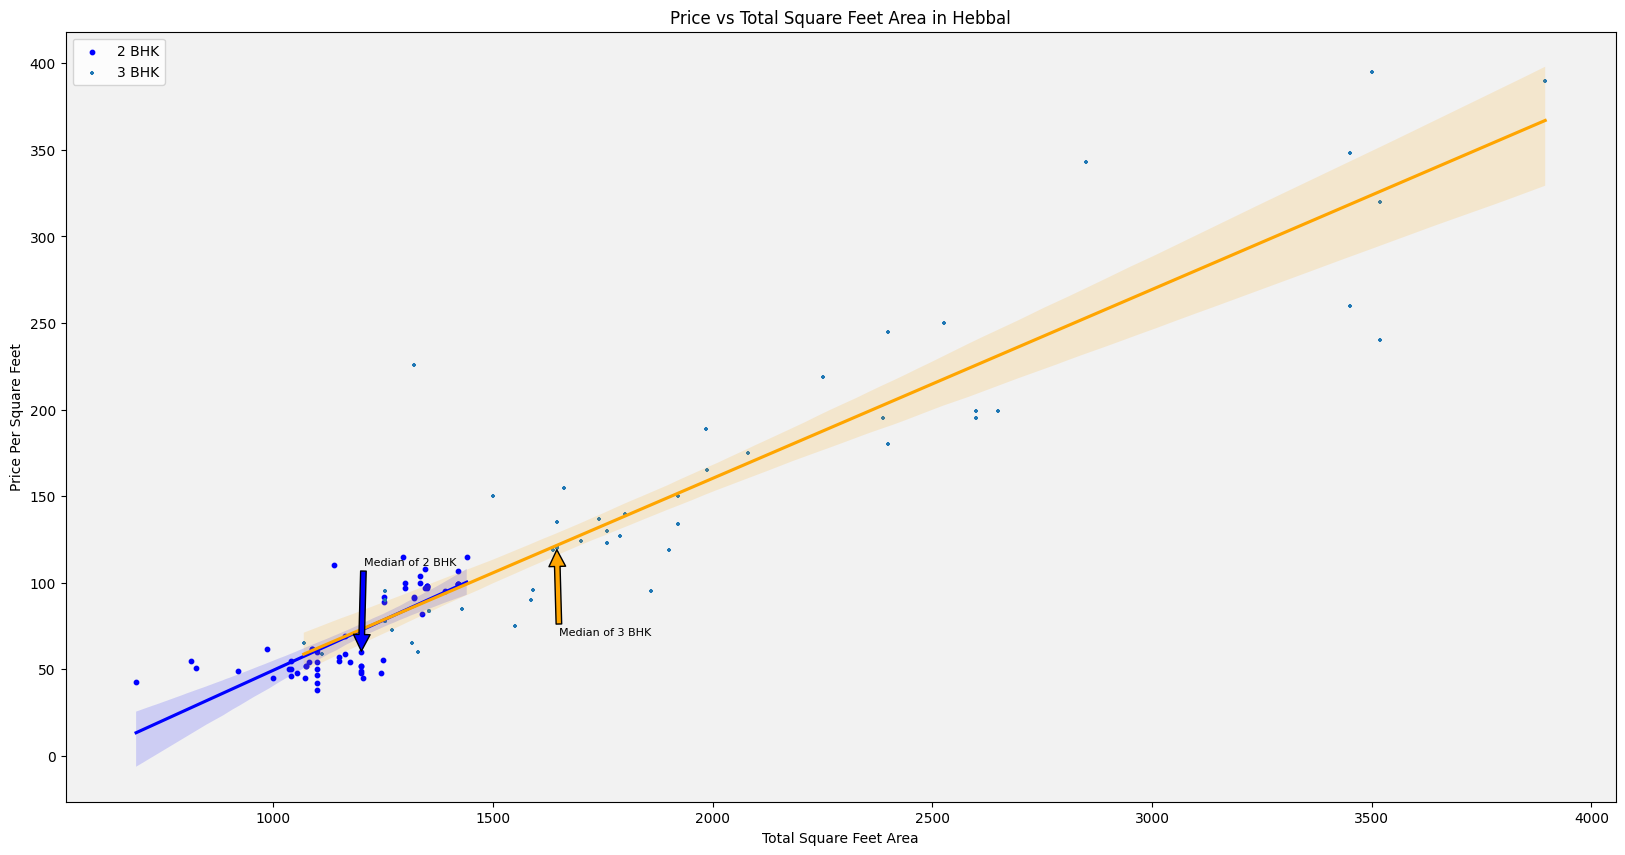

<Figure size 1500x1000 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_scatter_chart(df, location, sample_size=1000):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    
    # Filter out extreme outliers
    bhk2_filtered = bhk2[bhk2.price <= np.percentile(bhk2.price, 99)]  # Filter out top 1% of prices
    bhk3_filtered = bhk3[bhk3.price <= np.percentile(bhk3.price, 99)]  # Filter out top 1% of prices
    
    # Sample data to reduce the number of data points
    bhk2_sample = bhk2_filtered.sample(n=min(sample_size, len(bhk2_filtered)))  # Added random_state for reproducibility
    bhk3_sample = bhk3_filtered.sample(n=min(sample_size, len(bhk3_filtered)))  # Added random_state for reproducibility
    
    # Set background color
    plt.figure(figsize=(20, 10))  # Reduced figure size
    
    # Scatter plots for 2 BHK and 3 BHK with reduced marker size
    plt.scatter(bhk2_sample.total_sqft, bhk2_sample.price, color='blue', label='2 BHK', s=10)  # Reduced marker size
    plt.scatter(bhk3_sample.total_sqft, bhk3_sample.price, marker='+', label='3 BHK', s=10)  # Reduced marker size
    
    # Trend lines
    sns.regplot(x=bhk2_sample.total_sqft, y=bhk2_sample.price, scatter=False, color='blue')

    sns.regplot(x=bhk3_sample.total_sqft, y=bhk3_sample.price, scatter=False, color='orange')
    
    # Annotations for median prices with reduced font size
    plt.annotate('Median of 2 BHK', xy=(np.median(bhk2_sample.total_sqft), np.median(bhk2_sample.price)), xytext=(np.median(bhk2_sample.total_sqft)+5, np.median(bhk2_sample.price)+50),
                 arrowprops=dict(facecolor='blue', shrink=0.01), fontsize=8)  # Reduced font size
    plt.annotate('Median of 3 BHK', xy=(np.median(bhk3_sample.total_sqft), np.median(bhk3_sample.price)), xytext=(np.median(bhk3_sample.total_sqft)+5, np.median(bhk3_sample.price)-50),
                 arrowprops=dict(facecolor='orange', shrink=0.01), fontsize=8)  # Reduced font size
    
    # plt.xlim(500,1500) 
    # plt.ylim(2,10)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location))
    plt.legend()
    plt.grid(False)
    plt.gca().set_facecolor('#f2f2f2')  # Set background color
    # plt.yscale('log')
    plt.show()
    plt.savefig('plot1.png')
    
    
    
    
# Example usage with reduced sample size
plot_scatter_chart(bangalorepricedf6, 'Hebbal', sample_size=1000)

In [79]:
## Location need to be seggregated into dummy columns to ensure the unque values for location is split across as multiple correlated values across columns
dumies = pd.get_dummies(bangalorepricedf6.location)
dumies.head(3)

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Anandapura,Ananth Nagar,Anekal,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [82]:
bangalorepricedf7 = pd.concat([bangalorepricedf6, dumies.drop('other',axis = 'columns')], axis='columns')
bangalorepricedf7.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,other,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Delete the location column as dummy values are added to the data frame
bangalorepricedf8 = bangalorepricedf7.drop('location', axis='columns')
bangalorepricedf8 = bangalorepricedf8.dropna()
bangalorepricedf8.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#Define Dependent and independent variables

x = bangalorepricedf8.drop('price', axis='columns')
x.head()

,total_sqft,bath,balcony,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,1.0,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,4305.555556,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y = bangalorepricedf8.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [122]:
## Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

lr_model=  LinearRegression()
lr_model.fit(X_train, y_train)
model_score = lr_model.score(X_test,y_test)
y_pred = lr_model.predict(X_test)

n = X_test.shape[0]
p = X_test.shape[1]

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

#print(y_pred)

print('R Square Value', r2)
print('Adjusted R Square Value', adjusted_r2)
print('Mean Absolute Error', mae)
print('Root Mean Square Error', rmse)

# Display the coefficients
print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)



R Square Value 0.7509666954940455
Adjusted R Square Value 0.7408088676272029
Mean Absolute Error 25.519816901836208
Root Mean Square Error 64.50690433700923
Coefficients: [ 4.81810035e-02  2.50994948e+01  2.93454757e-01 -6.07022023e+00
  2.11845179e-02 -2.37926458e+00 -9.94787577e+00 -1.61152004e+01
  2.02711144e+00 -6.75852000e+00 -8.70284596e-01 -5.36283700e+00
  9.92209290e-01  2.95989899e+01  2.11791600e+01  3.04201615e+01
 -1.86255171e+01 -1.59627904e+00 -3.95529829e-01 -1.32181698e+01
  1.63477750e+00 -2.33769008e+01  8.96839950e+00 -3.90470272e+00
 -1.92401236e+01  2.09702833e+01 -6.75474098e+00  1.27149804e+01
  1.15995183e+01 -1.56474836e+01 -2.51785444e+00  9.42853556e-01
  3.48185513e+01  1.31213346e+01  7.91634711e+00 -4.20004063e+00
  1.22378014e+01  1.62884131e+01  1.42042484e+01  1.21431029e+01
  1.64932214e+01  8.45759982e+00  6.69882453e+00  9.55699544e+00
 -1.48647980e+01 -3.91912792e+00  1.94494771e+00 -8.46487642e-01
 -1.55473108e+01 -3.60671463e+00 -1.46673526e+01 

In [ ]:
# Calculate the multi colliniarity, remove the unwanted variables from the model
#Process can be repeated till we have a model with Adjusted R Square value b/w .8 and .9
#Calculate the p value for all the independent variables, lowest p values can be eliminated manually to further fine tune the model


In [117]:
# Importing numpy & scikit-learn 
import numpy as np 
from sklearn.model_selection import train_test_split
 
x_train, X_test, y_train, y_test = train_test_split(x,y, 
											train_size=0.8, 
											random_state=42)
 
# Splitting combined dataset in 50-50 fashion .i.e. 
# Testing set is 50% of combined dataset 
# Validation set is 50% of combined dataset 
x_val, x_test, y_val, y_test = train_test_split(X_test, 
												y_test, 
												test_size=0.5, 
												random_state=42)
 
# Training set 
print("Training set x: ",x_train) 
print("Training set y: ",y_train) 
print(" ")
 
# Testing set 
print("Testing set x: ",x_test) 
print("Testing set y: ",y_test) 
print(" ")
 
# Validation set 
print("Validation set x: ",x_val) 
print("Validation set y: ",y_val) 

Training set x:         total_sqft  bath  balcony  bhk  price_per_sqft  5th Phase JP Nagar  \
3143       1280.0   2.0      2.0    2     4062.500000                   0   
2755        645.0   1.0      1.0    1     2550.387597                   0   
5433       1580.0   3.0      3.0    3     3389.873418                   0   
8271       3569.0   4.0      1.0    4    16811.431774                   0   
2405       1036.0   2.0      3.0    2     3798.262548                   0   
...           ...   ...      ...  ...             ...                 ...   
12788      1583.0   3.0      1.0    3     6015.792798                   0   
5557       2396.0   4.0      2.0    4    13564.273790                   0   
5771       1425.0   2.0      2.0    3     4561.403509                   0   
918        1300.0   1.0      0.0    1    15384.615385                   0   
7807       1240.0   2.0      1.0    2     4724.193548                   0   

       7th Phase JP Nagar  8th Phase JP Nagar  9th Phase J